<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Milestone4_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import time

from warnings import simplefilter
simplefilter('ignore', category=UserWarning) # ignore 'fit without feature names' warning
simplefilter('ignore', category=FutureWarning) # ignore XGBoost warning about is_categorical_dtype

<h1>Data Importing<h1>
<ul>
<li>full_df contains everything, including the one-hot-encoded/labeled variables and the response all together
<li>pred contains only the predictors
<li>resp contains the response variable Operational Energy
<ul>
<p>The steps below are to roughly prepare the data for usage, getting rid of the index columns and verifying the data is correct<p>

In [2]:
full_df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Full_data.csv")
pred = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Predictors_data.csv")
resp = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Response_data.csv")

In [3]:
#Dropping index columns
full_df = full_df.drop('Unnamed: 0', axis=1)
pred = pred.drop('Unnamed: 0', axis=1)
resp = resp.drop('Unnamed: 0', axis=1)

In [4]:
full_df.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal,OE
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,1,0,0,0,0,0,0,1,141.615293
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,1,0,0,0,0,0,0,1,127.674846
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,1,0,0,0,255.768779
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,1,0,0,0,0,1,0,0,0,126.355396
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,0,0,0,0,0,0,1,0,0,124.733609


In [5]:
pred.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,0,1,0,0,0,0,0,0,1
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,0,1,0,0,0,0,0,0,1
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,0,1,0,0,0
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,0,1,0,0,0,0,1,0,0,0
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,1,0,0,0,0,0,0,1,0,0


In [6]:
resp.head(5)

,OE
0,141.615293
1,127.674846
2,255.768779
3,126.355396
4,124.733609


<hr>
<hr>
<h1> Start your Models here! <h1>
<hr>
<hr>

In [7]:
pred.shape

(32500, 34)

In [8]:
resp.shape

(32500, 1)

<h1>Random Forest Regression<h1>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    pred,
    resp,
    test_size=0.2,
    random_state=42
)

In [10]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

In [11]:
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(oob_score=True, random_state=42)

In [12]:
y_pred = rf.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)

oob_score = rf.oob_score_

In [14]:
mse, oob_score

(80.28851734132633, 0.9983000796106327)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_scaled = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf_scaled.fit(X_train_scaled, y_train.values.ravel())

y_pred_scaled = rf_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)

oob_score_scaled = rf_scaled.oob_score_

{
    "MSE": mse,
    "MSE_scaled": mse_scaled,
    "OOB_score": oob_score,
    "OOB_score_scaled": oob_score_scaled
}

{'MSE': 80.28851734132633,
 'MSE_scaled': 80.28423139578837,
 'OOB_score': 0.9983000796106327,
 'OOB_score_scaled': 0.998299588599214}

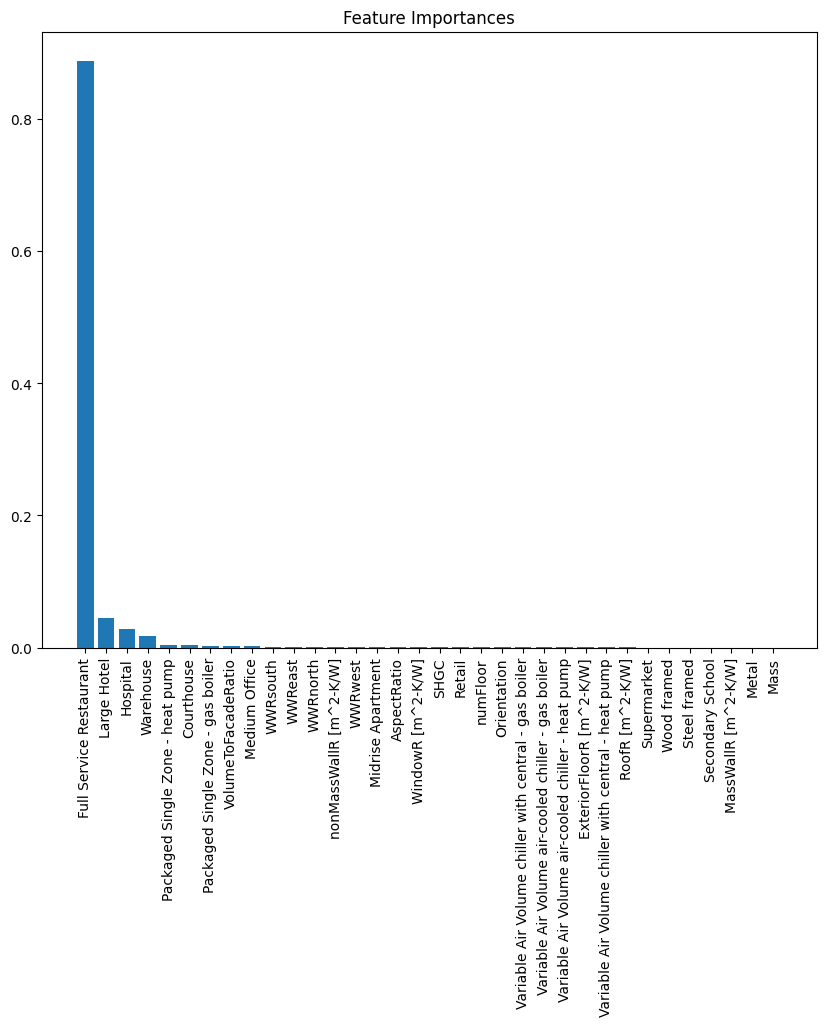

In [16]:
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

names = [X_train.columns[i] for i in indices]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

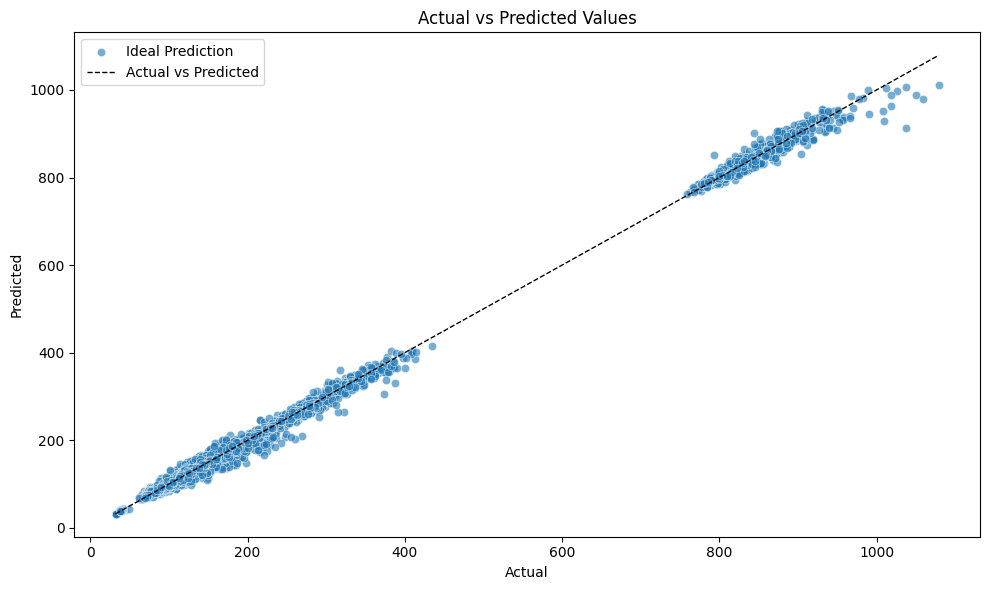

In [17]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=y_test.values.ravel(), y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend(['Ideal Prediction', 'Actual vs Predicted'])
plt.tight_layout()
plt.show()

Here is the scatter plot illustrating the relationship between the true values of the response variable and the values predicted by the Random Forest Regressor. Each point represents a different observation from the test set.

The diagonal dashed line represents the line of perfect predictions where the true values are exactly equal to the predicted values. Ideally, all points should fall on or very close to this line, indicating accurate predictions.

The points are very tightly clustered around the line, which visually confirms the high R-squared value we saw earlier. This suggests that the model's predictions are very close to the actual values for most of the test data. However, it's always good to remain cautious of overfitting and validate the model further with cross-validation if needed.

In [18]:
program_columns = [
    "Courthouse",
    "Full Service Restaurant",
    "Hospital",
    "Large Hotel",
    "Medium Office",
    "Midrise Apartment",
    "Retail",
    "Secondary School",
    "Supermarket",
    "Warehouse",
]

wall_columns = [
    "Mass",
    "Steel framed",
    "Wood framed",
    "Metal",
]

equip_columns = [
    "Packaged Single Zone - gas boiler",
    "Packaged Single Zone - heat pump",
    "Variable Air Volume air-cooled chiller - gas boiler",
    "Variable Air Volume air-cooled chiller - heat pump",
    "Variable Air Volume chiller with central - gas boiler",
    "Variable Air Volume chiller with central - heat pump",
]

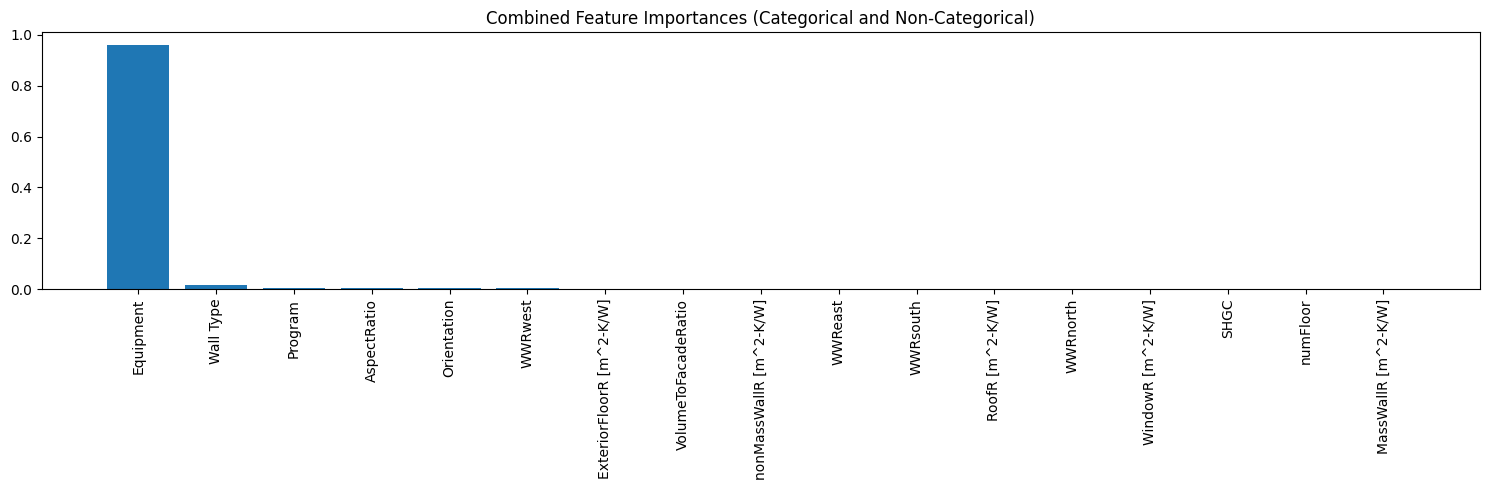

In [19]:
program_importance = np.sum([feature_importances[names.index(feature)] for feature in program_columns])

wall_importance = np.sum([feature_importances[names.index(feature)] for feature in wall_columns])

equip_importance = np.sum([feature_importances[names.index(feature)] for feature in equip_columns])

non_cat_features = [feature for feature in names if feature not in program_columns + wall_columns + equip_columns]
non_cat_importances = [feature_importances[names.index(feature)] for feature in non_cat_features]

combined_cat_importances = [program_importance, wall_importance, equip_importance]
combined_cat_names = ['Program', 'Wall Type', 'Equipment']
combined_importances = np.concatenate((non_cat_importances, combined_cat_importances))
combined_names = np.concatenate((non_cat_features, combined_cat_names))

combined_indices = np.argsort(combined_importances)[::-1]
combined_names_sorted = combined_names[combined_indices]
combined_importances_sorted = combined_importances[combined_indices]

plt.figure(figsize=(15, 5))
plt.title("Combined Feature Importances (Categorical and Non-Categorical)")
plt.bar(range(len(combined_importances)), combined_importances_sorted, align='center')
plt.xticks(range(len(combined_importances)), combined_names_sorted, rotation=90)
plt.tight_layout()
plt.show()

In [20]:
rf_scaled = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf_scaled.fit(X_train_scaled, y_train.values.ravel())

y_pred_scaled = rf_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)

oob_score_scaled = rf_scaled.oob_score_

mse_scaled, oob_score_scaled

(80.28423139578837, 0.998299588599214)

Tuning the model

In [22]:
param_grid_small = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_small,
                              cv=2, verbose=2, n_jobs=-1)

rf_grid_search.fit(X_train_scaled, y_train.values.ravel())

best_params_grid = rf_grid_search.best_params_
best_params_grid

Fitting 2 folds for each of 32 candidates, totalling 64 fits


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [23]:
final_rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='auto',
    oob_score=True,
    random_state=42
)

final_rf.fit(X_train_scaled, y_train.values.ravel())

final_y_pred = final_rf.predict(X_test_scaled)

final_mse = mean_squared_error(y_test, final_y_pred)

final_oob_score = final_rf.oob_score_

final_mse, final_oob_score

(80.5747467750846, 0.9982450345346688)

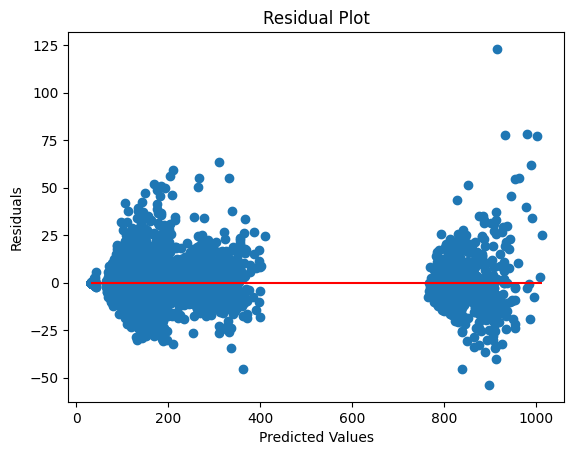

In [26]:
y_test_values = y_test.values.ravel() #to convert to 1-D array

residuals = y_test_values - final_y_pred

plt.scatter(final_y_pred, residuals)
plt.hlines(y=0, xmin=final_y_pred.min(), xmax=final_y_pred.max(), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

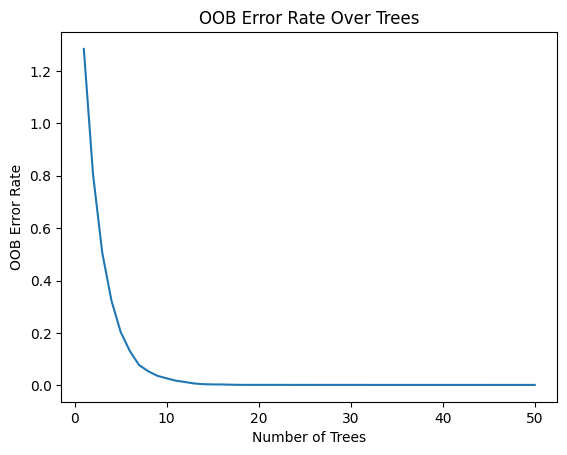

In [28]:
oob_scores = []

rf = RandomForestRegressor(n_estimators=1, warm_start=True, oob_score=True,
                           max_features='auto', random_state=42)

for n_trees in range(1, 51):
    rf.set_params(n_estimators=n_trees)
    rf.fit(X_train_scaled, y_train.values.ravel())

    oob_scores.append(rf.oob_score_)

oob_errors = [1 - oob for oob in oob_scores]

plt.plot(range(1, 51), oob_errors)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Over Trees')
plt.show()